In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\hswag\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [47]:
pip install opencv-python

     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.2/38.1 MB 6.7 MB/s eta 0:00:06
     ---------------------------------------- 0.2/38.1 MB 6.7 MB/s eta 0:00:06
     ---------------------------------------- 0.2/38.1 MB 6.7 MB/s eta 0:00:06
     ---------------------------------------- 0.3/38.1 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.5/38.1 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.5/38.1 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.5/38.1 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.5/38.1 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.7/38.1 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.7/38.1 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.7/38.1 MB 1.7 MB/s eta 0:00:22
      --------------------------------------- 0.7/38.1 MB 1


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\hswag\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [48]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
import cv2

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8EB4-8E8D

 Directory of C:\Users\hswag\OneDrive\Desktop\cb\project\Object_Detection_and_Tracking

29-11-2023  12:33    <DIR>          .
29-11-2023  10:39    <DIR>          ..
29-11-2023  12:26    <DIR>          .ipynb_checkpoints
29-11-2023  12:33           115,367 01_extract_text_from_xml.ipynb
28-11-2023  10:24    <DIR>          Annotation
29-11-2023  10:34               410 data.yaml
29-11-2023  10:36    <DIR>          Dataset
28-11-2023  10:24    <DIR>          Object_Tracking
29-11-2023  10:41                 7 requirements.txt
29-11-2023  10:37    <DIR>          resources
               3 File(s)        115,784 bytes
               7 Dir(s)  120,712,654,848 bytes free


In [10]:
cd ..

C:\Users\hswag\OneDrive\Desktop\cb\project\Object_Detection_and_Tracking


In [16]:
ann_path='Annotation/Annotation_For3Class.csv'

df_ann= pd.read_csv(ann_path)


In [90]:
df_ann

,ImagePath,X0,X1,Y0,Y1,Class
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH
...,...,...,...,...,...,...
5995,000002320334.jpg,411,492,433,516,DO NOT ENTER
5996,000014575054.jpg,38,84,457,517,DO NOT ENTER
5997,000014590475.jpg,48,74,458,526,DO NOT ENTER
5998,000000480308.jpg,76,123,548,589,DO NOT ENTER


In [31]:
# step-1: get path of each xml file
folder_path= glob('./Dataset/*')
img_files=[]

for i in folder_path:
    images= glob(i+'/*.jpg')
    for img in images:
        img_files.append(img)
        
# xmlfiles = glob('./data_images/*.xml')
# # replace \\ with /
# replace_text = lambda x: x.replace('\\','/')
# xmlfiles = list(map(replace_text,xmlfiles))

In [33]:
replace_text= lambda x:x.replace('\\','/')
imgfiles=list(map(replace_text,img_files))

In [64]:
Width=[]
Height=[]
img_n=[]
for i in (df_ann['ImagePath']):
    if i in img_n:
        continue
    for j in imgfiles:
    # print(i,j)
    # break
        if j.split('/')[-1] == i:
                          
            img = cv2.imread(j)
            height, width, channels = img.shape
            Width.append(width)
            Height.append(height)
            img_n.append(i)
    

In [65]:
len(Height),len(Width)

(5644, 5644)

In [71]:
dat={'Width': Width, 'Height': Height, "imagename" :img_n}
df= pd.DataFrame(dat)
len(df["imagename"].unique())

5610

In [89]:
df

,Width,Height,imagename
0,1920,1080,000015335564.jpg
1,1920,1080,000015340509.jpg
2,1920,1080,000016400582.jpg
3,1920,1080,000016450565.jpg
4,1920,1080,000024250089.jpg
...,...,...,...
5639,1920,1080,000002320334.jpg
5640,1920,1080,000014575054.jpg
5641,1920,1080,000014590475.jpg
5642,1920,1080,000000480308.jpg


In [76]:
merged_df = pd.merge(df_ann, df, left_on='ImagePath', right_on='imagename', how='left')


In [77]:
merged_df

,ImagePath,X0,X1,Y0,Y1,Class,Width,Height,imagename
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH,1920,1080,000015335564.jpg
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH,1920,1080,000015340509.jpg
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH,1920,1080,000016400582.jpg
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH,1920,1080,000016450565.jpg
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH,1920,1080,000024250089.jpg
...,...,...,...,...,...,...,...,...,...
6073,000002320334.jpg,411,492,433,516,DO NOT ENTER,1920,1080,000002320334.jpg
6074,000014575054.jpg,38,84,457,517,DO NOT ENTER,1920,1080,000014575054.jpg
6075,000014590475.jpg,48,74,458,526,DO NOT ENTER,1920,1080,000014590475.jpg
6076,000000480308.jpg,76,123,548,589,DO NOT ENTER,1920,1080,000000480308.jpg


In [93]:
df1= merged_df.drop('imagename', axis=1, errors='ignore')
df1 = df1.rename(columns={'X0': 'xmin',  'Y0': 'ymin', 'X1':'xmax', 'Y1':'ymax'})
df1

,ImagePath,xmin,xmax,ymin,ymax,Class,Width,Height
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH,1920,1080
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH,1920,1080
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH,1920,1080
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH,1920,1080
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH,1920,1080
...,...,...,...,...,...,...,...,...
6073,000002320334.jpg,411,492,433,516,DO NOT ENTER,1920,1080
6074,000014575054.jpg,38,84,457,517,DO NOT ENTER,1920,1080
6075,000014590475.jpg,48,74,458,526,DO NOT ENTER,1920,1080
6076,000000480308.jpg,76,123,548,589,DO NOT ENTER,1920,1080


In [91]:
df1['Class'].value_counts()

Class
DIRECTIONAL ARROW AUXILIARY    2041
DO NOT ENTER                   2032
ADVISORY SPEED MPH             2005
Name: count, dtype: int64

#### Conversion
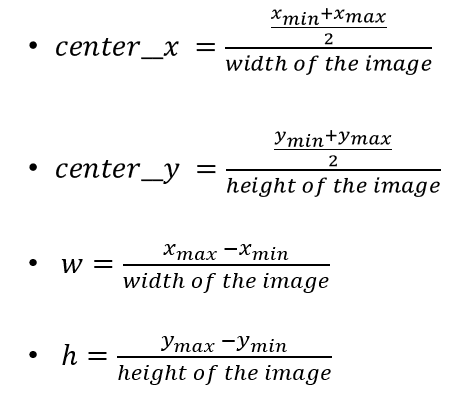

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6078 entries, 0 to 6077
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImagePath  6078 non-null   object
 1   X0         6078 non-null   int64 
 2   X1         6078 non-null   int64 
 3   Y0         6078 non-null   int64 
 4   Y1         6078 non-null   int64 
 5   Class      6078 non-null   object
 6   Width      6078 non-null   int64 
 7   Height     6078 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 380.0+ KB


In [94]:
# center x, center y
df1['center_x'] = ((df1['xmax']+df1['xmin'])/2)/df1['Width']
df1['center_y'] = ((df1['ymax']+df1['ymin'])/2)/df1['Height']
# w 
df1['w'] = (df1['xmax']-df1['xmin'])/df1['Width']
# h 
df1['h'] = (df1['ymax']-df1['ymin'])/df1['Height']

In [95]:
df1.head()

,ImagePath,xmin,xmax,ymin,ymax,Class,Width,Height,center_x,center_y,w,h
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH,1920,1080,0.051042,0.458796,0.018750,0.034259
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH,1920,1080,0.906250,0.468056,0.020833,0.037963
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH,1920,1080,0.032813,0.443519,0.013542,0.020370
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH,1920,1080,0.938802,0.512500,0.039062,0.067593
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH,1920,1080,0.203646,0.432407,0.038542,0.068519


### split data into train and test

In [97]:
images = df1['ImagePath'].unique()

In [98]:
len(images)

5610

In [99]:
# 80% train and 20% test
img_df = pd.DataFrame(images,columns=['filename'])
img_train = tuple(img_df.sample(frac=0.8)['filename']) # shuffle and pick 80% of images

In [100]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images

In [101]:
len(img_train), len(img_test)

(4488, 1122)

In [106]:
img_train[:5]

('000001825420.jpg',
 '000007670032.jpg',
 '000000435161.jpg',
 '000023415447.jpg',
 '000007795343.jpg')

In [107]:
train_df = df1.query(f'ImagePath in {img_train}')
test_df = df1.query(f'ImagePath in {img_test}')

In [108]:
train_df.head()

,ImagePath,xmin,xmax,ymin,ymax,Class,Width,Height,center_x,center_y,w,h
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH,1920,1080,0.051042,0.458796,0.018750,0.034259
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH,1920,1080,0.906250,0.468056,0.020833,0.037963
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH,1920,1080,0.032813,0.443519,0.013542,0.020370
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH,1920,1080,0.938802,0.512500,0.039062,0.067593
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH,1920,1080,0.203646,0.432407,0.038542,0.068519


In [109]:
test_df.head()

,ImagePath,xmin,xmax,ymin,ymax,Class,Width,Height,center_x,center_y,w,h
10,000019640055.jpg,1564,1622,412,467,ADVISORY SPEED MPH,1920,1080,0.829688,0.406944,0.030208,0.050926
13,000017935659.jpg,1708,1783,496,573,ADVISORY SPEED MPH,1920,1080,0.909115,0.494907,0.039062,0.071296
16,000019890533.jpg,1748,1819,515,581,ADVISORY SPEED MPH,1920,1080,0.928906,0.507407,0.036979,0.061111
18,000014090648.jpg,1596,1812,460,522,ADVISORY SPEED MPH,1920,1080,0.887500,0.454630,0.112500,0.057407
29,000006725235.jpg,1173,1241,507,579,ADVISORY SPEED MPH,1920,1080,0.628646,0.502778,0.035417,0.066667


### Assign id number to object names

In [110]:
df1['Class'].unique()

array(['ADVISORY SPEED MPH', 'DIRECTIONAL ARROW AUXILIARY',
       'DO NOT ENTER'], dtype=object)

In [111]:
# label encoding
def label_encoding(x):
    labels = {'ADVISORY SPEED MPH':0, 'DIRECTIONAL ARROW AUXILIARY':1, 'DO NOT ENTER':2}
    return labels[x]

In [112]:
train_df['id'] = train_df['Class'].apply(label_encoding)
test_df['id'] = test_df['Class'].apply(label_encoding)

In [113]:
train_df.head(10)

,ImagePath,xmin,xmax,ymin,ymax,Class,Width,Height,center_x,center_y,w,h,id
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH,1920,1080,0.051042,0.458796,0.018750,0.034259,0
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH,1920,1080,0.906250,0.468056,0.020833,0.037963,0
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH,1920,1080,0.032813,0.443519,0.013542,0.020370,0
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH,1920,1080,0.938802,0.512500,0.039062,0.067593,0
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH,1920,1080,0.203646,0.432407,0.038542,0.068519,0
5,000024270005.jpg,1740,1799,467,522,ADVISORY SPEED MPH,1920,1080,0.921615,0.457870,0.030729,0.050926,0
6,000024235187.jpg,1822,1872,379,427,ADVISORY SPEED MPH,1920,1080,0.961979,0.373148,0.026042,0.044444,0
7,000001005148.jpg,118,202,415,490,ADVISORY SPEED MPH,1920,1080,0.083333,0.418981,0.043750,0.069444,0
8,000021810659.jpg,66,127,450,511,ADVISORY SPEED MPH,1920,1080,0.050260,0.444907,0.031771,0.056481,0
9,000021815397.jpg,1679,1754,426,500,ADVISORY SPEED MPH,1920,1080,0.894010,0.428704,0.039062,0.068519,0


### Save Image and Labels in text

In [114]:
import os
from shutil import move

In [115]:
train_folder = 'Data/train'
test_folder = 'Data/test'


os.mkdir(train_folder)
os.mkdir(test_folder)

In [116]:
cols = ['ImagePath','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('ImagePath')
groupby_obj_test = test_df[cols].groupby('ImagePath')

In [155]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join('Data-R1',filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('ImagePath').to_csv(text_filename,sep=' ',index=False,header=False)
    

In [149]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [157]:
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
4483    None
4484    None
4485    None
4486    None
4487    None
Length: 4488, dtype: object

In [158]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0       None
1       None
2       None
3       None
4       None
        ... 
1117    None
1118    None
1119    None
1120    None
1121    None
Length: 1122, dtype: object